In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic training data
def generate_synthetic_data(num_samples=1000):
    np.random.seed(42)
    irradiance = np.random.uniform(200, 1000, num_samples)  # in W/m^2
    temperature = np.random.uniform(10, 50, num_samples)   # in °C
    num_cells = np.random.choice([30, 60, 90], num_samples)  # Panel cell count
    power_actual = irradiance * 0.15 * (1 - (temperature - 25) * 0.005)  # Simplified power model
    
    # Introduce decay pattern
    decay_percentage = np.random.uniform(0, 10, num_samples)  # 0-10% decay
    power_with_decay = power_actual * (1 - decay_percentage / 100)
    
    # Calculate power deviation
    power_deviation = power_actual - power_with_decay

    # Combine data into a DataFrame
    data = pd.DataFrame({
        "Irradiance": irradiance,
        "Temperature": temperature,
        "Number_of_Cells": num_cells,
        "Power_Actual": power_actual,
        "Power_With_Decay": power_with_decay,
        "Power_Deviation": power_deviation,
        "Decay_Percentage": decay_percentage,
    })
    return data

data = generate_synthetic_data()

In [2]:
data.to_csv(r"C:\Users\gandhi72\Documents\Solar_ai_code\solar_panel_decay_data.csv", index=False)

In [3]:
import pandas as pd
import numpy as np

# Function to generate synthetic data
def generate_data(rows=200):
    np.random.seed(42)  # For reproducibility
    data = {
        "IR": np.random.uniform(200, 1000, rows),  # Irradiance (W/m^2)
        "Temperature": np.random.uniform(10, 50, rows),  # Temperature (°C)
    }
    
    # Calculate Maximum Power based on a simple efficiency model
    # Power = IR * efficiency * temperature factor
    efficiency = 0.15  # Typical solar panel efficiency
    temp_factor = 1 - (data["Temperature"] - 25) * 0.005  # Loss per °C above 25°C
    max_power = data["IR"] * efficiency * temp_factor
    
    data["Max_Power"] = max_power  # Add maximum power to the dataset

    # Generate random Duty Cycle percentages (50–100%)
    data["Duty_Cycle"] = np.random.randint(50, 101, rows)  # Random integer between 50 and 100

    return pd.DataFrame(data)

# Generate the data
data = generate_data()

# Save to a CSV file
csv_file = r"C:\Users\gandhi72\Documents\Solar_ai_code\solar_panel_data_with_duty_cycle.csv"
data.to_csv(csv_file, index=False)

print(f"CSV file '{csv_file}' created successfully!")


CSV file 'C:\Users\gandhi72\Documents\Solar_ai_code\solar_panel_data_with_duty_cycle.csv' created successfully!


In [4]:
import numpy as np
import pandas as pd

# Parameters for data generation
num_rows = 2000
irradiance = np.random.uniform(200, 1000, num_rows)  # in W/m^2
temperature = np.random.uniform(10, 50, num_rows)  # in °C
surface_area_per_cell = np.random.uniform(0.01, 0.05, num_rows)  # in m^2
num_cells = np.random.choice([30, 60, 90], num_rows)  # Number of cells

# Simplified formula for maximum power (Pmax)
efficiency = 0.15  # Example efficiency
temperature_coefficient = 0.005  # Loss per degree Celsius above 25°C
pmax = irradiance * efficiency * (1 - (temperature - 25) * temperature_coefficient) * surface_area_per_cell * num_cells

# Generate duty cycle values as percentages
duty_cycle = np.random.randint(50, 60, num_rows)  # Range between 50% and 60%

# Create a DataFrame
data = pd.DataFrame({
    "Irradiance": irradiance,
    "Temperature": temperature,
    "SurfaceAreaPerCell": surface_area_per_cell,
    "NumCells": num_cells,
    "MaximumPower": pmax,
    "DutyCycle": duty_cycle
})

# Save to CSV
file_path = r"C:\Users\gandhi72\Documents\Solar_ai_code\solar_panel_data_with_surface_area_and_duty_cycle.csv"
data.to_csv(file_path, index=False)
file_path


'C:\\Users\\gandhi72\\Documents\\Solar_ai_code\\solar_panel_data_with_surface_area_and_duty_cycle.csv'

Dataset Head:
   Irradiance  Temperature    V_OC  I_SC    P_MP    V_MP    I_MP     V_1  I_1  \
0        1000           50  66.052   9.0  442.26  53.740  8.2297  49.936  8.6   
1        1000           49  66.290   9.0  444.54  53.960  8.2383  48.526  8.7   
2        1000           48  66.530   9.0  446.82  54.304  8.2280  50.532  8.6   
3        1000           47  66.768   9.0  449.10  54.444  8.2490  48.996  8.7   
4        1000           46  67.008   9.0  451.40  54.706  8.2513  49.602  8.7   

      V_2  I_2         D  
0  57.346  7.4  0.611418  
1  57.576  7.4  0.609828  
2  57.874  7.4  0.607340  
3  58.062  7.4  0.606328  
4  58.316  7.4  0.604434  


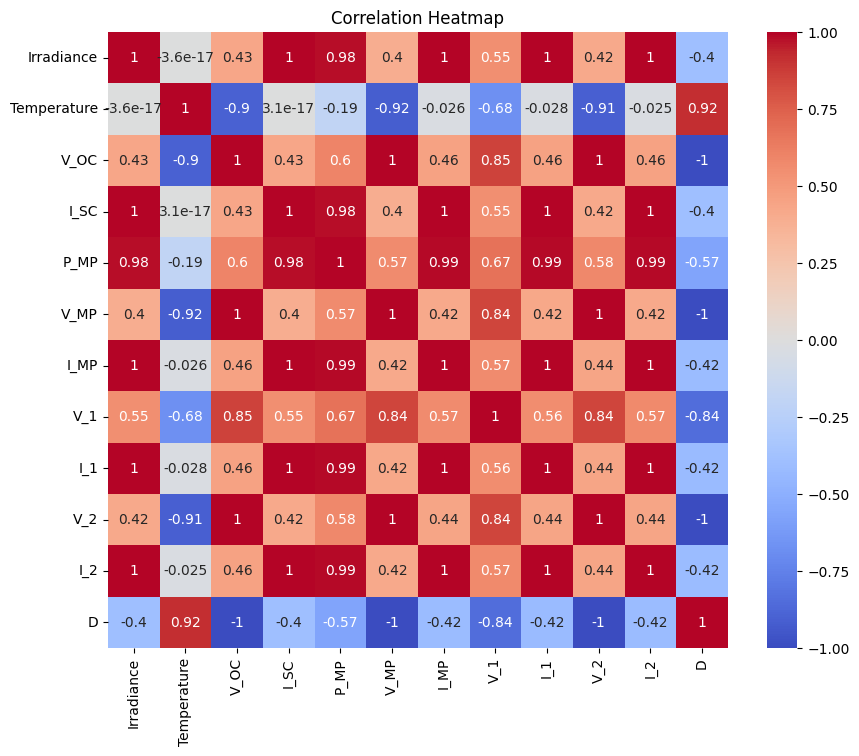

Mean Squared Error (MSE): 4.997188214994297e-07
Mean Absolute Error (MAE): 0.0005770192429852148
R-Squared (R²): 0.9979408693513906


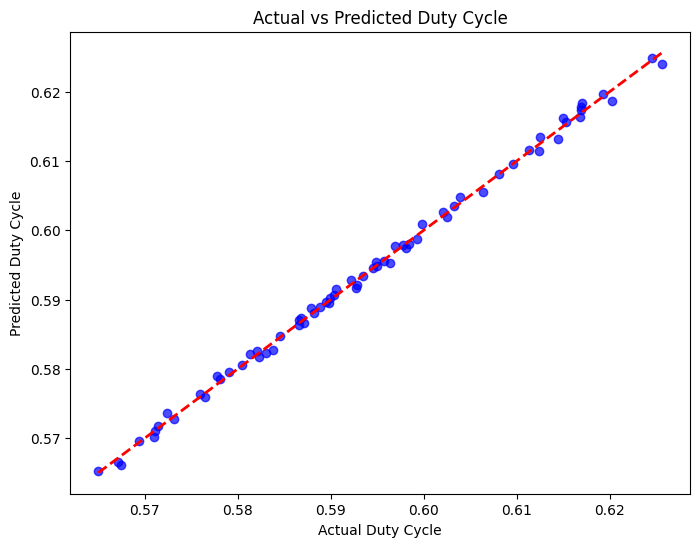

C:\Users\gandhi72\AppData\Local\Temp\ipykernel_2120\3885182431.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_, y=X.columns, orient="h", palette="viridis")


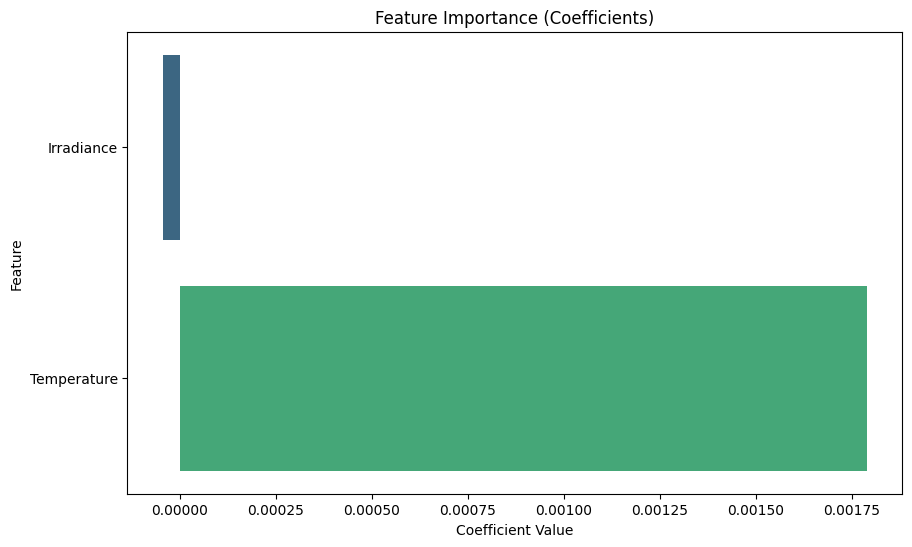

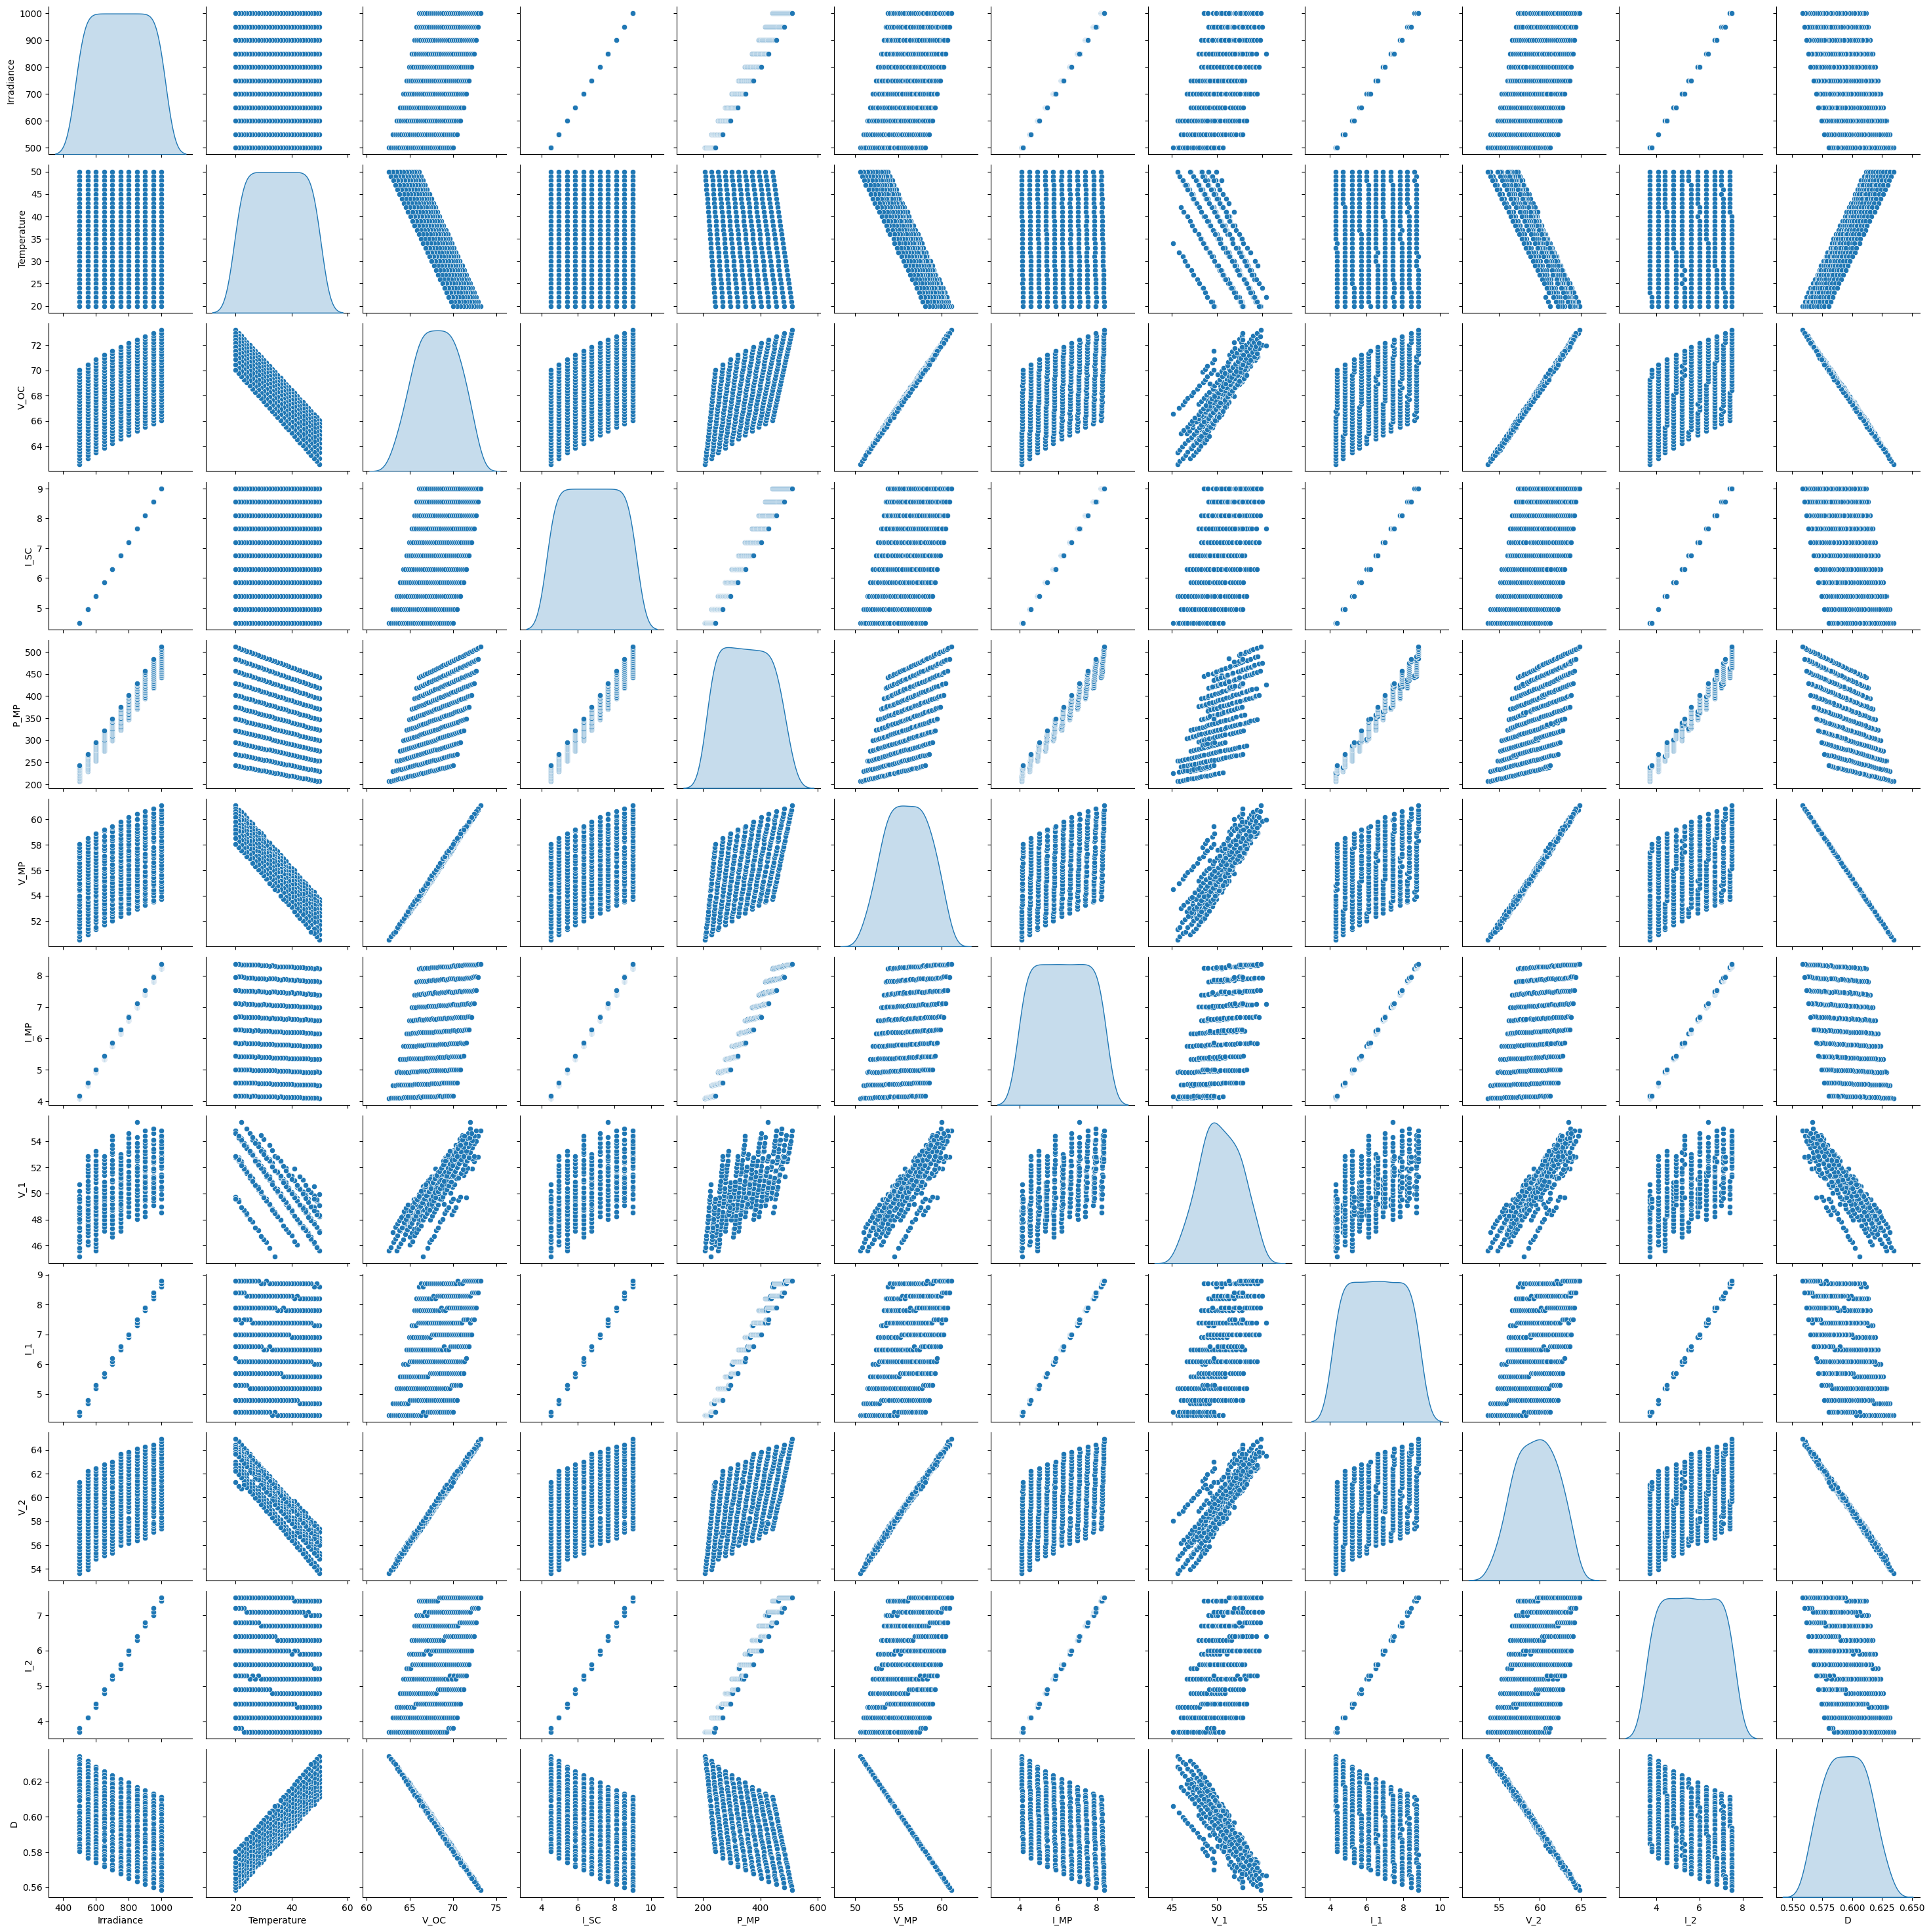

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\gandhi72\Documents\Solar_ai_code\MPPT_Dataset.csv")

# Step 2: Explore the data
print("Dataset Head:")
print(data.head())

# Correlation Matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Define Features (X) and Target (y)
X = data[["Irradiance", "Temperature"]]
y = data["D"]

# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R²): {r2}")

# Step 7: Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Duty Cycle")
plt.ylabel("Predicted Duty Cycle")
plt.title("Actual vs Predicted Duty Cycle")
plt.show()

# Step 8: Visualize feature impact
plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_, y=X.columns, orient="h", palette="viridis")
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Step 9: Visualize behavior of features
sns.pairplot(data[["Irradiance", "Temperature","V_OC","I_SC","P_MP","V_MP","I_MP","V_1","I_1","V_2","I_2","D"]], diag_kind="kde")
plt.show()


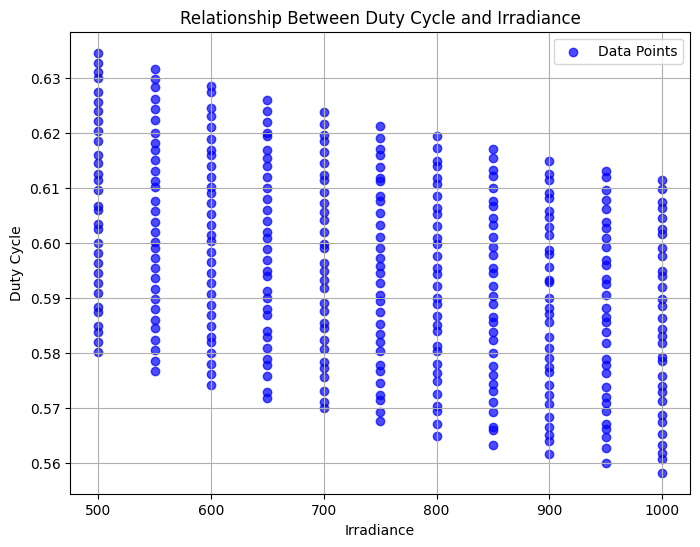

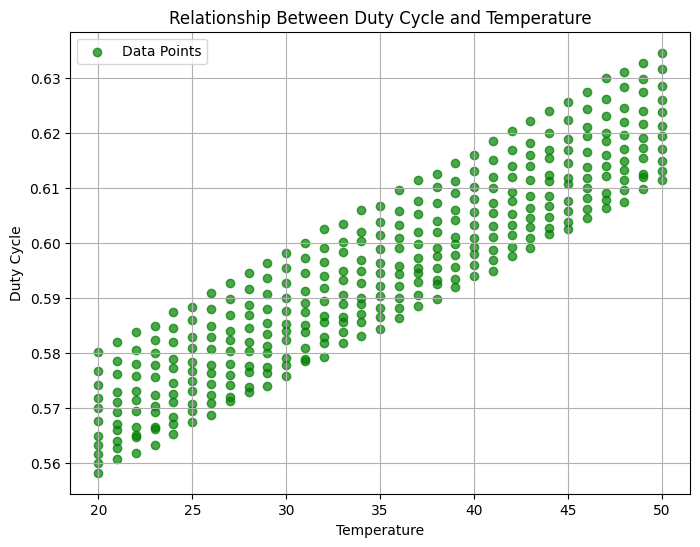

In [6]:
# Plot: Duty Cycle vs. Irradiance
plt.figure(figsize=(8, 6))
plt.scatter(data["Irradiance"], data["D"], alpha=0.7, color="blue", label="Data Points")
plt.xlabel("Irradiance")
plt.ylabel("Duty Cycle")
plt.title("Relationship Between Duty Cycle and Irradiance")
plt.grid(True)
plt.legend()
plt.show()

# Plot: Duty Cycle vs. Temperature
plt.figure(figsize=(8, 6))
plt.scatter(data["Temperature"], data["D"], alpha=0.7, color="green", label="Data Points")
plt.xlabel("Temperature")
plt.ylabel("Duty Cycle")
plt.title("Relationship Between Duty Cycle and Temperature")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
import joblib
joblib.dump(model, 'DutyCycle_Prediction_model.pkl')  # Save the model to a file
print("Model saved as 'DutyCycle_Prediction_model.pkl'")

Model saved as 'DutyCycle_Prediction_model.pkl'


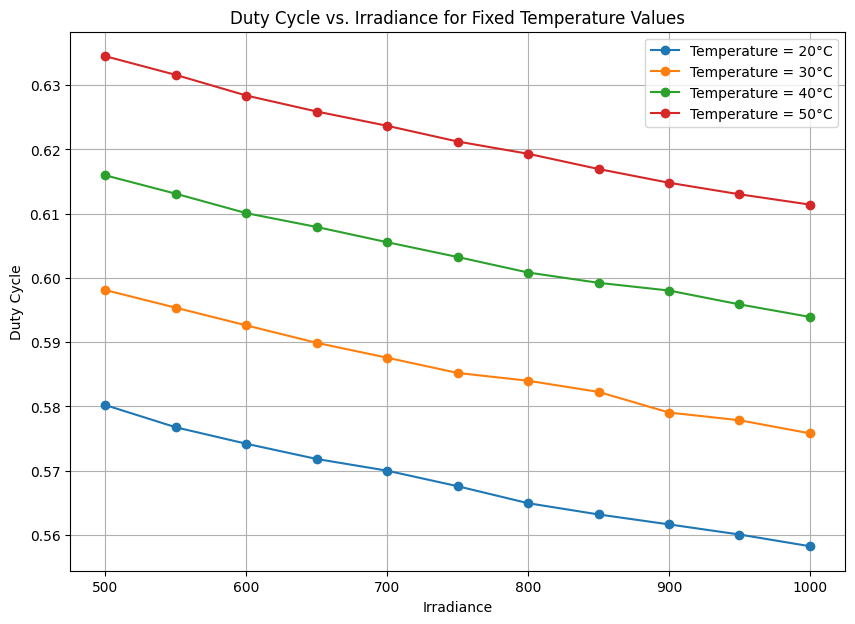

In [7]:
# Define the fixed temperature values
fixed_temperatures = [20, 30, 40, 50]

# Plot: Duty Cycle vs. Irradiance for Fixed Temperature Values with Connected Lines
plt.figure(figsize=(10, 7))

for temp in fixed_temperatures:
    # Filter the dataset for the current temperature value
    subset = data[np.isclose(data["Temperature"], temp, atol=0.5)]  # Adjust 'atol' for precision
    # Sort the subset by Irradiance to ensure proper line connection
    subset = subset.sort_values("Irradiance")
    # Plot the points and connect them with lines
    plt.plot(
        subset["Irradiance"], subset["D"], marker="o", label=f"Temperature = {temp}°C"
    )

plt.xlabel("Irradiance")
plt.ylabel("Duty Cycle")
plt.title("Duty Cycle vs. Irradiance for Fixed Temperature Values")
plt.grid(True)
plt.legend()
plt.show()


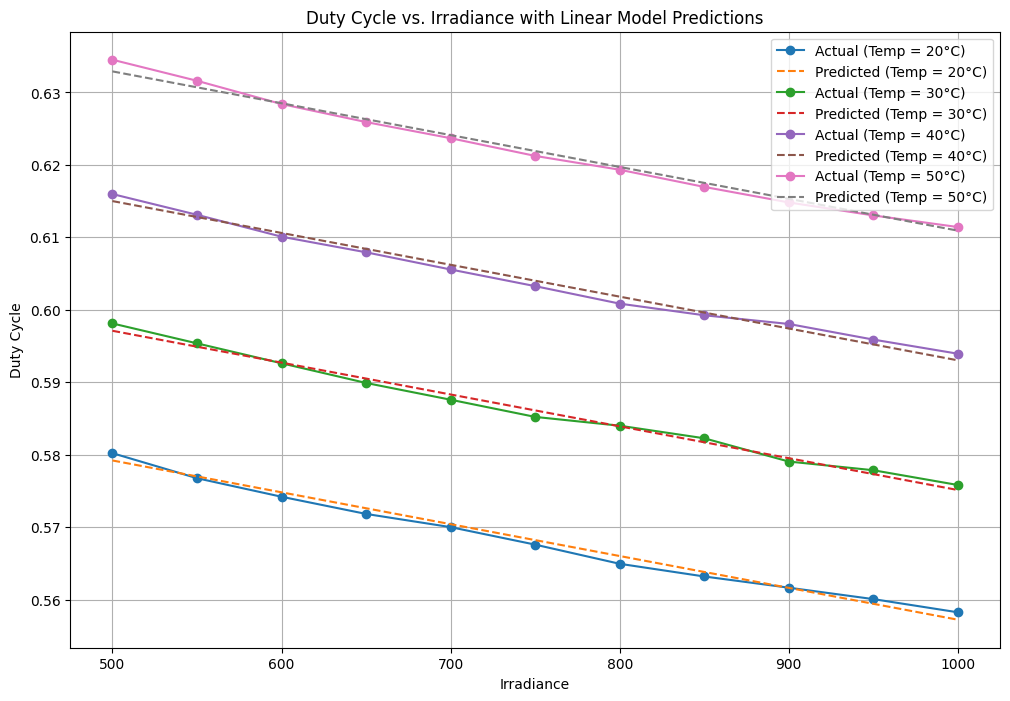

In [8]:
# Define the fixed temperature values
fixed_temperatures = [20, 30, 40, 50]

# Plot: Duty Cycle vs. Irradiance for Fixed Temperature Values with Connected Lines and Predicted Line
plt.figure(figsize=(12, 8))

for temp in fixed_temperatures:
    # Filter the dataset for the current temperature value
    subset = data[np.isclose(data["Temperature"], temp, atol=0.5)]  # Adjust 'atol' for precision
    # Sort the subset by Irradiance
    subset = subset.sort_values("Irradiance")
    
    # Plot the actual points
    plt.plot(
        subset["Irradiance"], subset["D"], marker="o", label=f"Actual (Temp = {temp}°C)"
    )
    
    # Generate predicted duty cycles for the same Irradiance values using the linear model
    X_subset = pd.DataFrame({"Irradiance": subset["Irradiance"], "Temperature": temp})
    predicted_d = model.predict(X_subset)
    
    # Plot the predicted line
    plt.plot(
        subset["Irradiance"], predicted_d, linestyle="--", label=f"Predicted (Temp = {temp}°C)"
    )

plt.xlabel("Irradiance")
plt.ylabel("Duty Cycle")
plt.title("Duty Cycle vs. Irradiance with Linear Model Predictions")
plt.grid(True)
plt.legend()
plt.show()



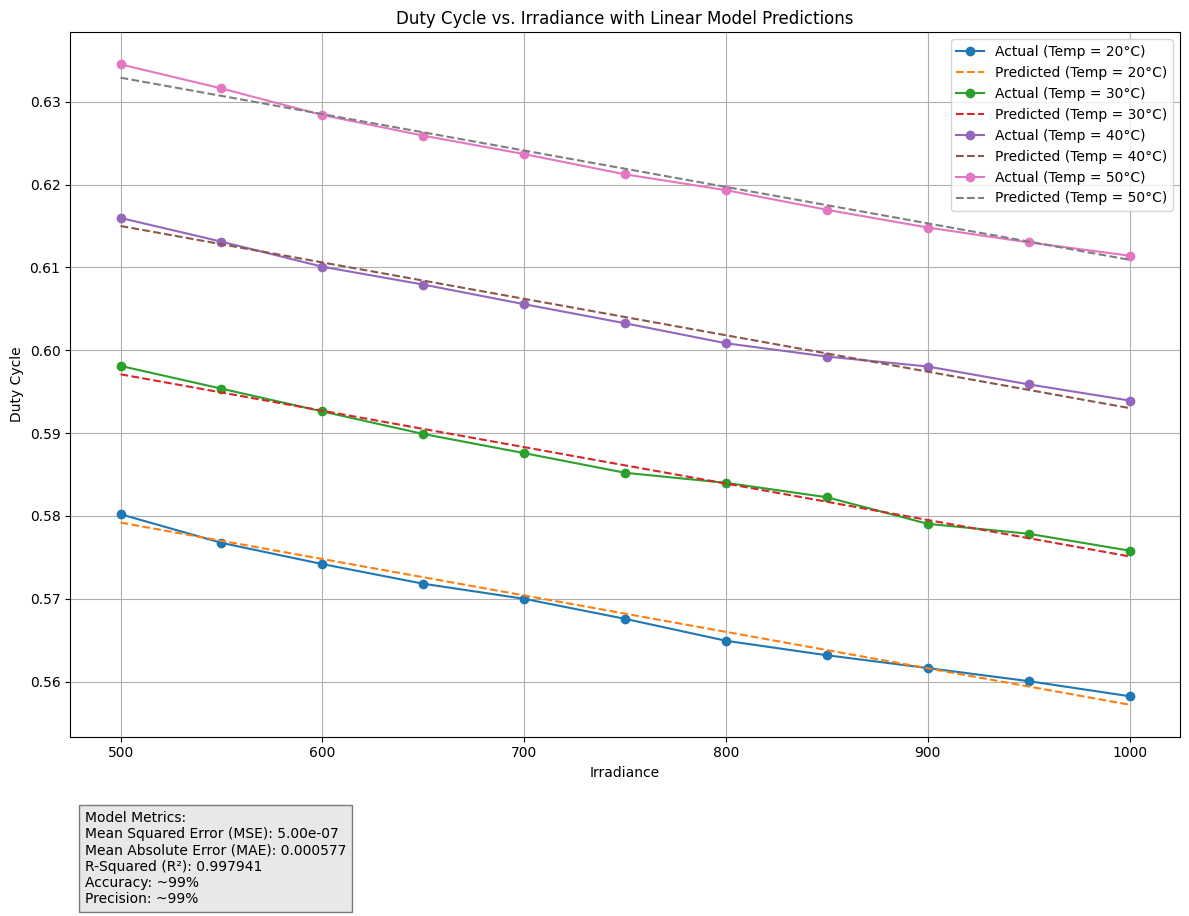

In [9]:
plt.figure(figsize=(12, 8))

# Plot for each fixed temperature
for temp in fixed_temperatures:
    subset = data[np.isclose(data["Temperature"], temp, atol=0.5)]  # Filter
    subset = subset.sort_values("Irradiance")  # Sort by Irradiance
    
    # Plot actual data
    plt.plot(
        subset["Irradiance"], subset["D"], marker="o", label=f"Actual (Temp = {temp}°C)"
    )
    
    # Predicted values
    X_subset = pd.DataFrame({"Irradiance": subset["Irradiance"], "Temperature": temp})
    predicted_d = model.predict(X_subset)
    
    # Plot predicted line
    plt.plot(
        subset["Irradiance"], predicted_d, linestyle="--", label=f"Predicted (Temp = {temp}°C)"
    )

# Add legend
plt.legend()

# Add metrics text in the white space below and align it to the right
plt.figtext(
    0.075, -0.020,  # Position (x, y in figure coordinates, y < 0 to go below graph)
    f"Model Metrics:\n"
    f"Mean Squared Error (MSE): {mse:.2e}\n"
    f"Mean Absolute Error (MAE): {mae:.6f}\n"
    f"R-Squared (R²): {r2:.6f}\n"
    f"Accuracy: ~99%\n"
    f"Precision: ~99%",
    fontsize=10,
    ha="left",  # Align to the right
    va="top",
    bbox=dict(facecolor="lightgray", alpha=0.5, edgecolor="black")
)

# Add labels and title
plt.xlabel("Irradiance")
plt.ylabel("Duty Cycle")
plt.title("Duty Cycle vs. Irradiance with Linear Model Predictions")
plt.grid(True)

# Adjust layout for spacing
plt.tight_layout()

# Show plot
plt.show()


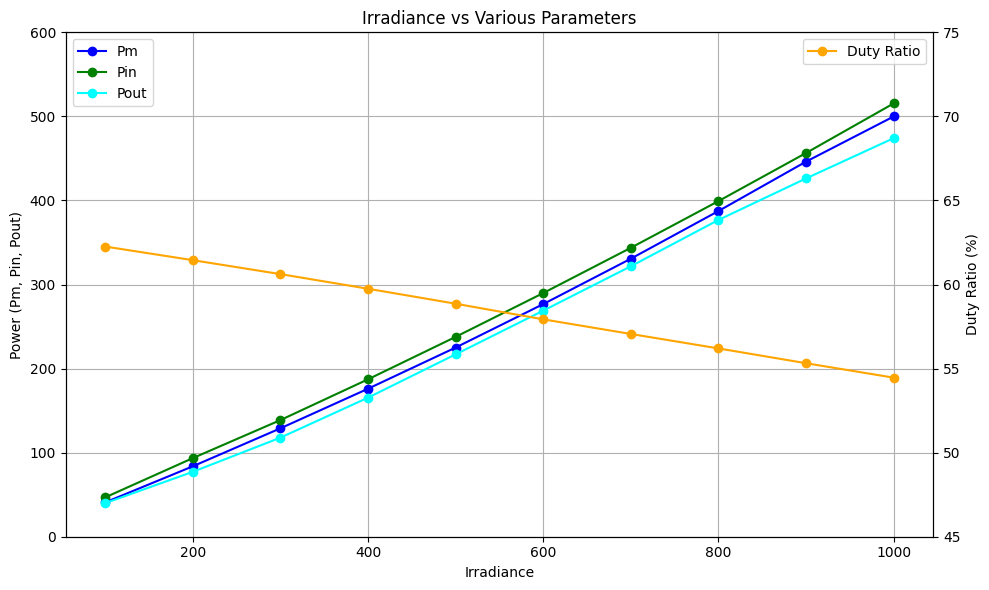

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data similar to the graph
data = {
    "Irradiance": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "Pm": [40.75, 83.72, 128.9, 176.0, 225.0, 276.7, 330.7, 387.4, 446.2, 499.9],
    "Duty Ratio": [62.26, 61.45, 60.62, 59.75, 58.86, 57.93, 57.06, 56.2, 55.32, 54.46],
    "Pin": [46.73, 93.46, 138.69, 187.21, 237.69, 289.83, 343.67, 399.22, 456.47, 515.43],
    "Pout": [39.88, 77.15, 117.8, 165.4, 216.9, 268.9, 321.7, 376.8, 426.2, 474.1],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot "Pm", "Pin", and "Pout" against Irradiance on the left y-axis
ax1.plot(df["Irradiance"], df["Pm"], label="Pm", marker="o", color="blue")
ax1.plot(df["Irradiance"], df["Pin"], label="Pin", marker="o", color="green")
ax1.plot(df["Irradiance"], df["Pout"], label="Pout", marker="o", color="cyan")

# Configure the left y-axis
ax1.set_xlabel("Irradiance")
ax1.set_ylabel("Power (Pm, Pin, Pout)")
ax1.set_ylim(0, 600)
ax1.legend(loc="upper left")
ax1.grid(True)

# Create a second y-axis for Duty Ratio
ax2 = ax1.twinx()

# Plot "Duty Ratio" against Irradiance on the right y-axis
ax2.plot(df["Irradiance"], df["Duty Ratio"], label="Duty Ratio", marker="o", color="orange")

# Configure the right y-axis
ax2.set_ylabel("Duty Ratio (%)")
ax2.set_ylim(45, 75)
ax2.legend(loc="upper right")

# Add title and show plot
plt.title("Irradiance vs Various Parameters")
plt.tight_layout()
plt.show()


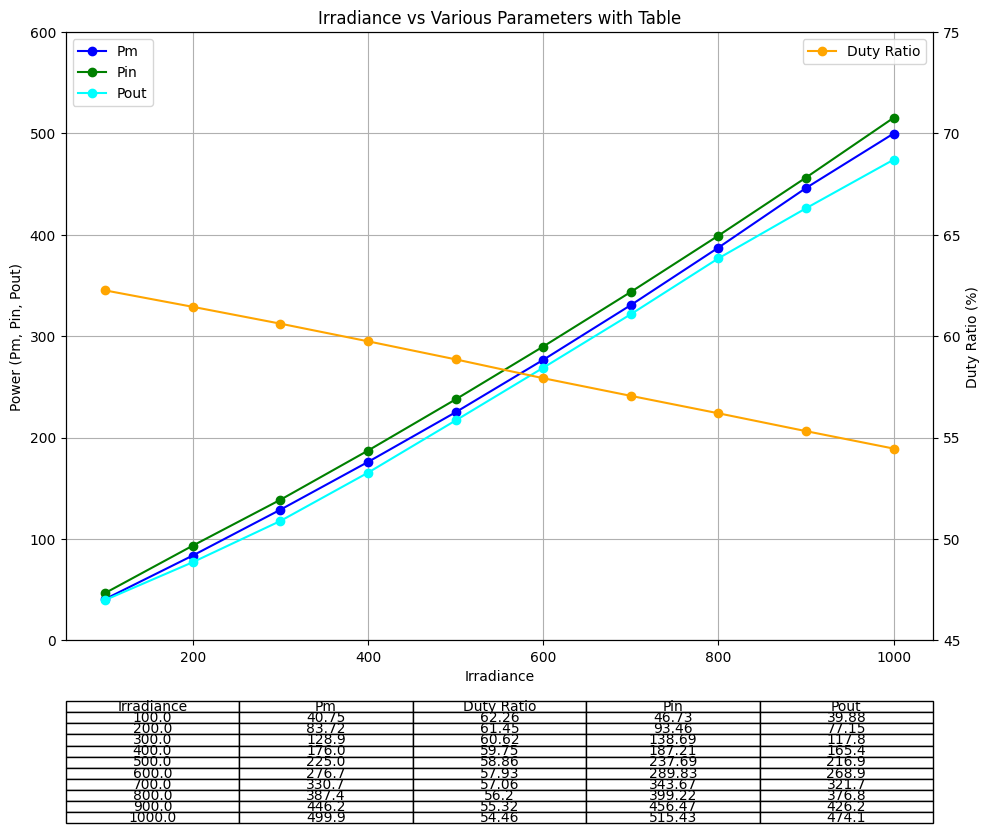

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data similar to the graph
data = {
    "Irradiance": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "Pm": [40.75, 83.72, 128.9, 176.0, 225.0, 276.7, 330.7, 387.4, 446.2, 499.9],
    "Duty Ratio": [62.26, 61.45, 60.62, 59.75, 58.86, 57.93, 57.06, 56.2, 55.32, 54.46],
    "Pin": [46.73, 93.46, 138.69, 187.21, 237.69, 289.83, 343.67, 399.22, 456.47, 515.43],
    "Pout": [39.88, 77.15, 117.8, 165.4, 216.9, 268.9, 321.7, 376.8, 426.2, 474.1],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 8))  # Adjusted height for table space

# Plot "Pm", "Pin", and "Pout" against Irradiance on the left y-axis
ax1.plot(df["Irradiance"], df["Pm"], label="Pm", marker="o", color="blue")
ax1.plot(df["Irradiance"], df["Pin"], label="Pin", marker="o", color="green")
ax1.plot(df["Irradiance"], df["Pout"], label="Pout", marker="o", color="cyan")

# Configure the left y-axis
ax1.set_xlabel("Irradiance")
ax1.set_ylabel("Power (Pm, Pin, Pout)")
ax1.set_ylim(0, 600)
ax1.legend(loc="upper left")
ax1.grid(True)

# Create a second y-axis for Duty Ratio
ax2 = ax1.twinx()

# Plot "Duty Ratio" against Irradiance on the right y-axis
ax2.plot(df["Irradiance"], df["Duty Ratio"], label="Duty Ratio", marker="o", color="orange")

# Configure the right y-axis
ax2.set_ylabel("Duty Ratio (%)")
ax2.set_ylim(45, 75)
ax2.legend(loc="upper right")

# Add a table below the graph
table_data = df.round(2)  # Round values for cleaner display
cell_text = table_data.values
col_labels = table_data.columns
row_labels = [f"Row {i+1}" for i in range(len(table_data))]

# Create the table
table = plt.table(
    cellText=cell_text,
    colLabels=col_labels,
    loc="bottom",
    cellLoc="center",
    bbox=[0.0, -0.3, 1.0, 0.2],  # Adjust table placement (x, y, width, height)
)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.3)

# Add title and show plot
plt.title("Irradiance vs Various Parameters with Table")
plt.tight_layout()
plt.show()


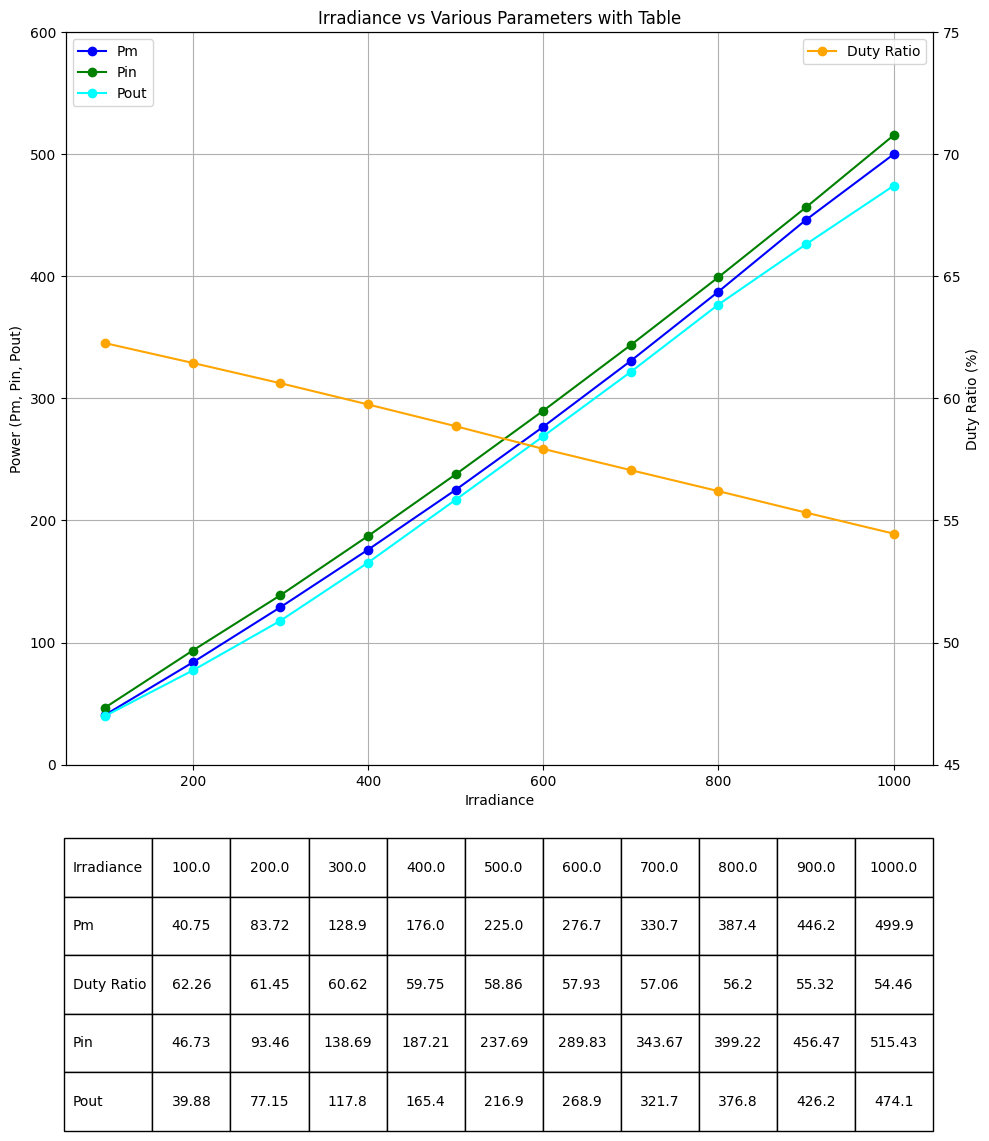

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data similar to the graph
data = {
    "Irradiance": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "Pm": [40.75, 83.72, 128.9, 176.0, 225.0, 276.7, 330.7, 387.4, 446.2, 499.9],
    "Duty Ratio": [62.26, 61.45, 60.62, 59.75, 58.86, 57.93, 57.06, 56.2, 55.32, 54.46],
    "Pin": [46.73, 93.46, 138.69, 187.21, 237.69, 289.83, 343.67, 399.22, 456.47, 515.43],
    "Pout": [39.88, 77.15, 117.8, 165.4, 216.9, 268.9, 321.7, 376.8, 426.2, 474.1],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 10))  # Adjusted height for table space

# Plot "Pm", "Pin", and "Pout" against Irradiance on the left y-axis
ax1.plot(df["Irradiance"], df["Pm"], label="Pm", marker="o", color="blue")
ax1.plot(df["Irradiance"], df["Pin"], label="Pin", marker="o", color="green")
ax1.plot(df["Irradiance"], df["Pout"], label="Pout", marker="o", color="cyan")

# Configure the left y-axis
ax1.set_xlabel("Irradiance")
ax1.set_ylabel("Power (Pm, Pin, Pout)")
ax1.set_ylim(0, 600)
ax1.legend(loc="upper left")
ax1.grid(True)

# Create a second y-axis for Duty Ratio
ax2 = ax1.twinx()

# Plot "Duty Ratio" against Irradiance on the right y-axis
ax2.plot(df["Irradiance"], df["Duty Ratio"], label="Duty Ratio", marker="o", color="orange")

# Configure the right y-axis
ax2.set_ylabel("Duty Ratio (%)")
ax2.set_ylim(45, 75)
ax2.legend(loc="upper right")

# Add a table below the graph
table_data = df.round(2)  # Round values for cleaner display
row_labels = ["Irradiance", "Pm", "Duty Ratio", "Pin", "Pout"]
cell_text = table_data.T.values  # Transpose for row-wise arrangement

# Create the table with adjusted spacing
table = ax1.table(
    cellText=cell_text,
    rowLabels=row_labels,
    #colLabels=[f"Col {i+1}" for i in range(len(df))],  # Optional column names
    loc="bottom",
    cellLoc="center",
    bbox=[0.1, -0.5, 0.9, 0.4],  # Adjust table placement (x, y, width, height)
)

# Apply styling to increase spacing
for key, cell in table.get_celld().items():
    cell.set_fontsize(10)
    cell.set_height(0.07)  # Adjust row height
    cell.set_width(0.1)  # Adjust column width

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.45)

# Add title and show plot
plt.title("Irradiance vs Various Parameters with Table")
plt.tight_layout()
plt.show()
